In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

dataset = 'admit.csv'
admitData = pd.read_csv(dataset)

X = admitData.iloc[:, 1:8] # select columns 1-7 with all rows
y = admitData.iloc[:, 8] # select 8th column


# test data
admitData

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=7)

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

# test prediction
prediction = model.predict(X_test)
prediction

array([0.63333333, 0.85666667, 0.93      , 0.71      , 0.59666667,
       0.81333333, 0.88333333, 0.77333333, 0.69      , 0.83      ,
       0.66666667, 0.63333333, 0.68666667, 0.59666667, 0.67666667,
       0.68      , 0.45333333, 0.51666667, 0.49666667, 0.74      ,
       0.93666667, 0.8       , 0.85      , 0.68      , 0.51333333,
       0.70666667, 0.94      , 0.71666667, 0.73666667, 0.71666667,
       0.75      , 0.74666667, 0.62      , 0.6       , 0.65666667,
       0.8       , 0.63333333, 0.69      , 0.85666667, 0.71666667,
       0.93      , 0.77333333, 0.62333333, 0.77333333, 0.62666667,
       0.66666667, 0.95333333, 0.86      , 0.50333333, 0.62333333,
       0.77333333, 0.87      , 0.50333333, 0.93      , 0.84      ,
       0.88333333, 0.86      , 0.74666667, 0.69666667, 0.74666667,
       0.92333333, 0.93666667, 0.50333333, 0.74666667, 0.62333333,
       0.83666667, 0.74      , 0.74666667, 0.65666667, 0.59666667,
       0.93      , 0.80666667, 0.63333333, 0.67666667, 0.63666

In [43]:
# calculate R-squared
r2 = r2_score(y_test, prediction)
print("Accuracy:", r2)

Accuracy: 0.6241981540234263


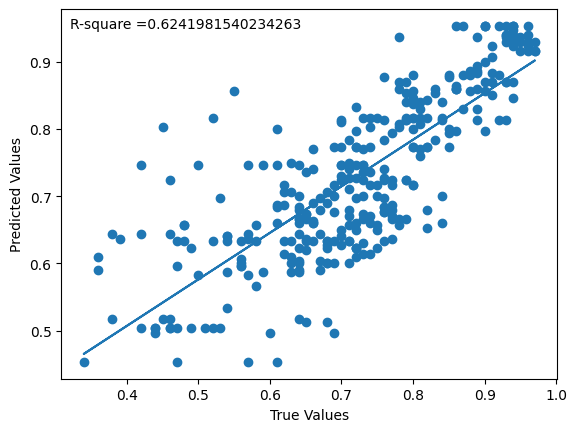

In [44]:
a, b = np.polyfit(y_test, prediction, 1)

plt.scatter(y_test, prediction)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot(y_test, a*y_test+b)
plt.text(0.32, 0.95, 'R-square =' + str(r2))

plt.show()

In [45]:
# predict Mean squared error (MSE)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)

MSE: 0.007572847222222223


In [46]:
# predict Mean absolute error (MAE)
mae = mean_absolute_error(y_test, prediction)
print("MAE:", mae)

MAE: 0.06404166666666666


In [47]:
# predict Root mean squared error (RMSE)
rmse = mean_squared_error(y_test, prediction, squared=False)
print("RMSE:", rmse)

RMSE: 0.08702210766364041


In [48]:
# function for precision at k
def precision_at_k(y_test, y_pred, k):

    # sort the prediction values by probability in descending order
    sorted_pred_values = np.argsort(y_pred)[::-1] 

    # select the top k sorted prediction values
    top_k_sorted_pred_values = sorted_pred_values[:k]

    # precision at k
    true_positives = np.sum(y_test[top_k_sorted_pred_values])
    precision_at_k = true_positives / k

    return precision_at_k

# precision at k=5
precision_at_5 = precision_at_k(y_test, prediction, k=5)
print("precision_at_k=5: ", precision_at_5)

precision_at_k=5:  0.7899999999999999
